In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [19]:

df=pd.read_csv("/content/laptop_prices.csv")
print(df)

     Company                              Product            TypeName  Inches  \
0      Apple                          MacBook Pro           Ultrabook    13.3   
1      Apple                          Macbook Air           Ultrabook    13.3   
2         HP                               250 G6            Notebook    15.6   
3      Apple                          MacBook Pro           Ultrabook    15.4   
4      Apple                          MacBook Pro           Ultrabook    13.3   
...      ...                                  ...                 ...     ...   
1270  Lenovo                       Yoga 500-14ISK  2 in 1 Convertible    14.0   
1271  Lenovo                       Yoga 900-13ISK  2 in 1 Convertible    13.3   
1272  Lenovo                   IdeaPad 100S-14IBR            Notebook    14.0   
1273      HP  15-AC110nv (i7-6500U/6GB/1TB/Radeon            Notebook    15.6   
1274    Asus  X553SA-XX031T (N3050/4GB/500GB/W10)            Notebook    15.6   

      Ram          OS  Weig

**display the columns of the dataset**

In [2]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model'],
      dtype='object')

**Handle Missing Values**

check for missing values

In [12]:
df.isnull().sum()

,0
Company,0
Product,0
TypeName,0
Inches,0
Ram,0
OS,0
Weight,0
Price_euros,0
Screen,0
ScreenW,0


**Convert Categorical Data to Numerical**

In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Create a sample DataFrame with categorical data
data = {
    'Company': ['Apple', 'Dell', 'HP', 'Apple', 'Dell'],
    'TypeName': ['Laptop', 'Desktop', 'Laptop', 'Desktop', 'Laptop']
}
df = pd.DataFrame(data)

# Label Encoding
label_encoder = LabelEncoder()
df['Company_LabelEncoded'] = label_encoder.fit_transform(df['Company'])
df['TypeName_LabelEncoded'] = label_encoder.fit_transform(df['TypeName'])

# One-Hot Encoding
one_hot_encoder = pd.get_dummies(df[['Company', 'TypeName']], drop_first=True)

# Combine the original DataFrame with the encoded features
df = pd.concat([df, one_hot_encoder], axis=1)

print(df)



  Company TypeName  Company_LabelEncoded  TypeName_LabelEncoded  Company_Dell  \
0   Apple   Laptop                     0                      1         False   
1    Dell  Desktop                     1                      0          True   
2      HP   Laptop                     2                      1         False   
3   Apple  Desktop                     0                      0         False   
4    Dell   Laptop                     1                      1          True   

   Company_HP  TypeName_Laptop  
0       False             True  
1       False            False  
2        True             True  
3       False            False  
4       False             True  


**Feature Selection**

In [21]:
X = df.drop(['Price_euros'], axis=1)  # Features
y = df['Price_euros']  # Target variable

categorical_features = ['Company', 'Product', 'TypeName', 'OS', 'CPU_company', 'CPU_model', 'GPU_company', 'GPU_model', 'PrimaryStorageType', 'SecondaryStorageType', 'Screen', 'Touchscreen', 'IPSpanel', 'RetinaDisplay']
numerical_features = ['Inches', 'Ram', 'Weight', 'ScreenW', 'ScreenH', 'CPU_freq', 'PrimaryStorage', 'SecondaryStorage']

X_categorical = X[categorical_features]
X_numerical = X[numerical_features]

X_categorical = pd.get_dummies(X_categorical, drop_first=True)
X = pd.concat([X_numerical, X_categorical], axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

print("X_train head: \n", X_train.head())
print("X_test head: \n", X_test.head())
print("y_train head: \n", y_train.head())
print("y_test head: \n", y_test.head())




Shape of X_train:  (1020, 874)
Shape of X_test:  (255, 874)
Shape of y_train:  (1020,)
Shape of y_test:  (255,)
X_train head: 
       Inches  Ram  Weight  ScreenW  ScreenH  CPU_freq  PrimaryStorage  \
413     13.3    8    1.60     1920     1080       2.5             256   
778     14.0   16    1.95     1920     1080       2.8             512   
1107    15.6    4    2.10     1920     1080       2.3             256   
96      15.6    8    2.20     1920     1080       2.7            1024   
309     15.6    4    1.86     1920     1080       2.0            1024   

      SecondaryStorage  Company_Apple  Company_Asus  ...  \
413                  0          False         False  ...   
778                  0          False         False  ...   
1107                 0          False         False  ...   
96                   0          False         False  ...   
309                  0          False         False  ...   

      PrimaryStorageType_SSD  SecondaryStorageType_Hybrid  \
413        

**Data Exploration**


In [6]:
print(df.head())


  Company      Product   TypeName  Inches  Ram     OS  Weight  Price_euros  \
0   Apple  MacBook Pro  Ultrabook    13.3    8  macOS    1.37      1339.69   
1   Apple  Macbook Air  Ultrabook    13.3    8  macOS    1.34       898.94   
2      HP       250 G6   Notebook    15.6    8  No OS    1.86       575.00   
3   Apple  MacBook Pro  Ultrabook    15.4   16  macOS    1.83      2537.45   
4   Apple  MacBook Pro  Ultrabook    13.3    8  macOS    1.37      1803.60   

     Screen  ScreenW  ...  RetinaDisplay CPU_company CPU_freq      CPU_model  \
0  Standard     2560  ...            Yes       Intel      2.3        Core i5   
1  Standard     1440  ...             No       Intel      1.8        Core i5   
2   Full HD     1920  ...             No       Intel      2.5  Core i5 7200U   
3  Standard     2880  ...            Yes       Intel      2.7        Core i7   
4  Standard     2560  ...            Yes       Intel      3.1        Core i5   

  PrimaryStorage  SecondaryStorage PrimaryStorageT

In [7]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [8]:
print(df.describe())


            Inches          Ram       Weight  Price_euros      ScreenW  \
count  1275.000000  1275.000000  1275.000000  1275.000000  1275.000000   
mean     15.022902     8.440784     2.040525  1134.969059  1900.043922   
std       1.429470     5.097809     0.669196   700.752504   493.346186   
min      10.100000     2.000000     0.690000   174.000000  1366.000000   
25%      14.000000     4.000000     1.500000   609.000000  1920.000000   
50%      15.600000     8.000000     2.040000   989.000000  1920.000000   
75%      15.600000     8.000000     2.310000  1496.500000  1920.000000   
max      18.400000    64.000000     4.700000  6099.000000  3840.000000   

           ScreenH     CPU_freq  PrimaryStorage  SecondaryStorage  
count  1275.000000  1275.000000     1275.000000       1275.000000  
mean   1073.904314     2.302980      444.517647        176.069020  
std     283.883940     0.503846      365.537726        415.960655  
min     768.000000     0.900000        8.000000          0.00

**Univariate Analysis**


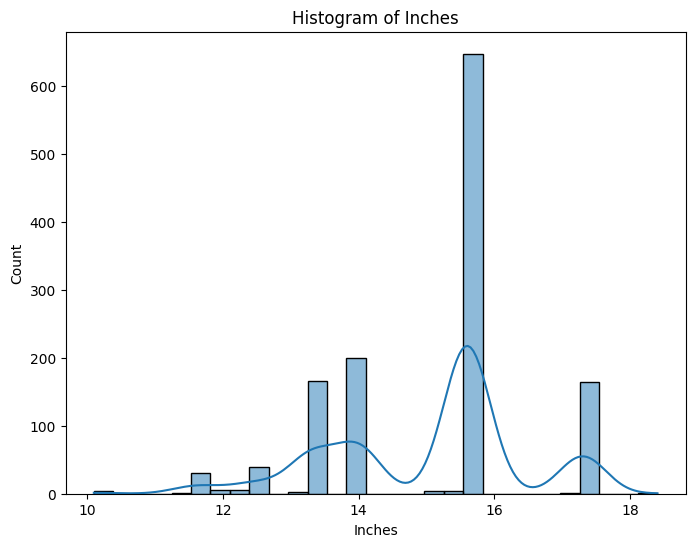

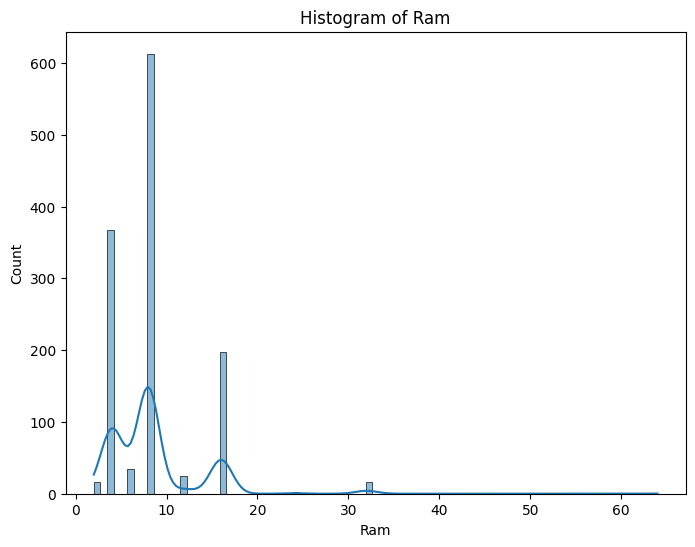

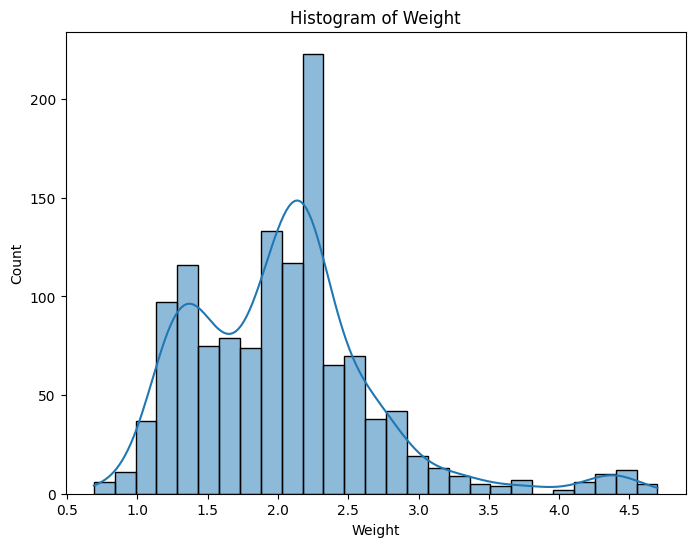

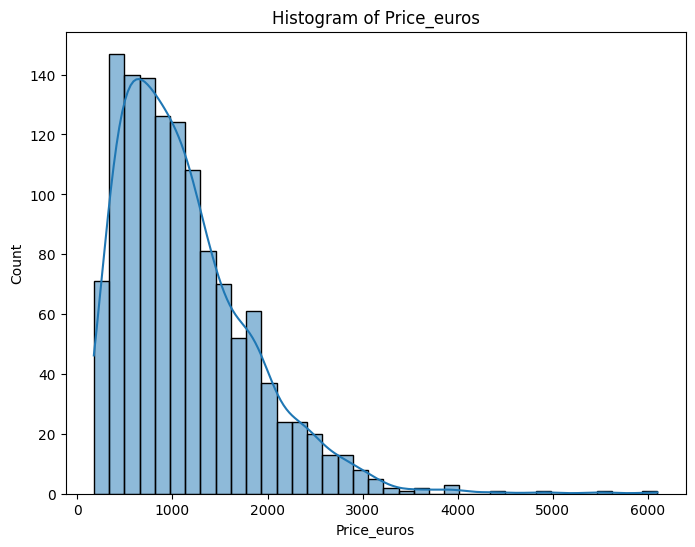

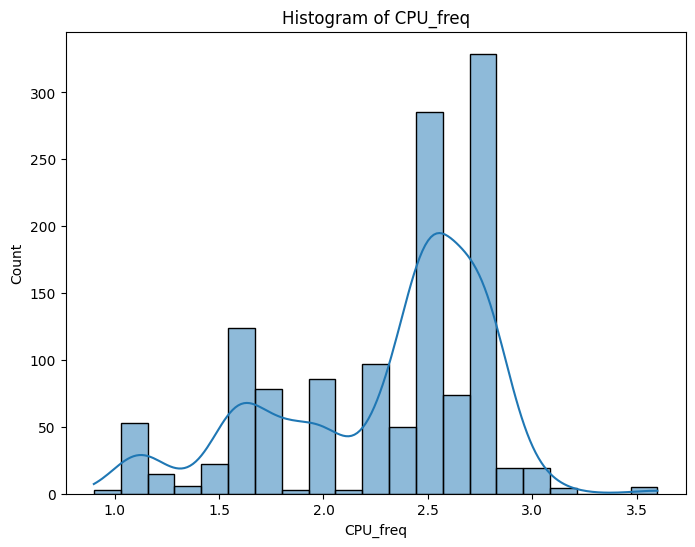

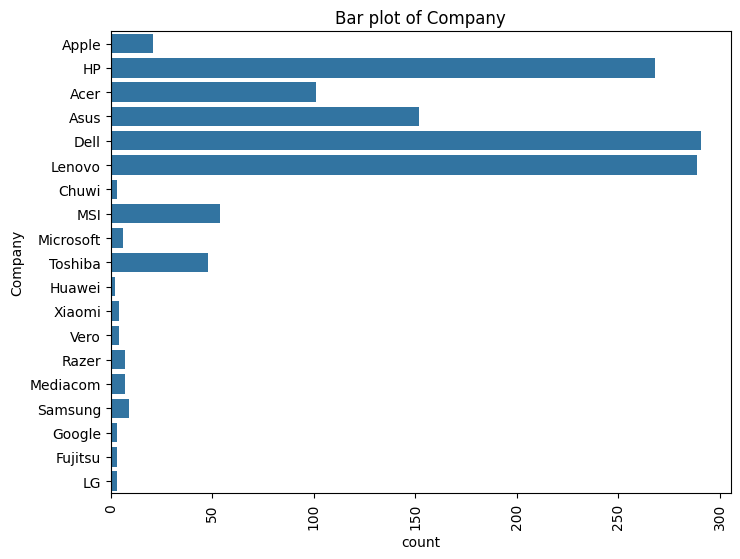

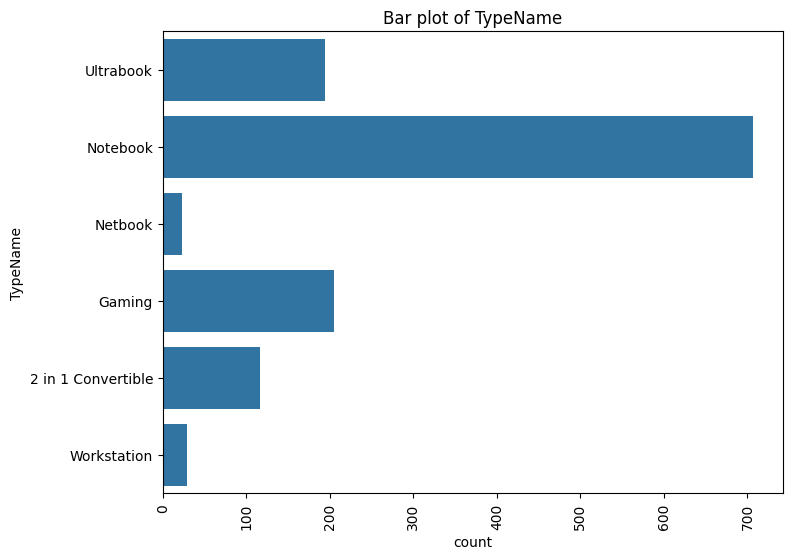

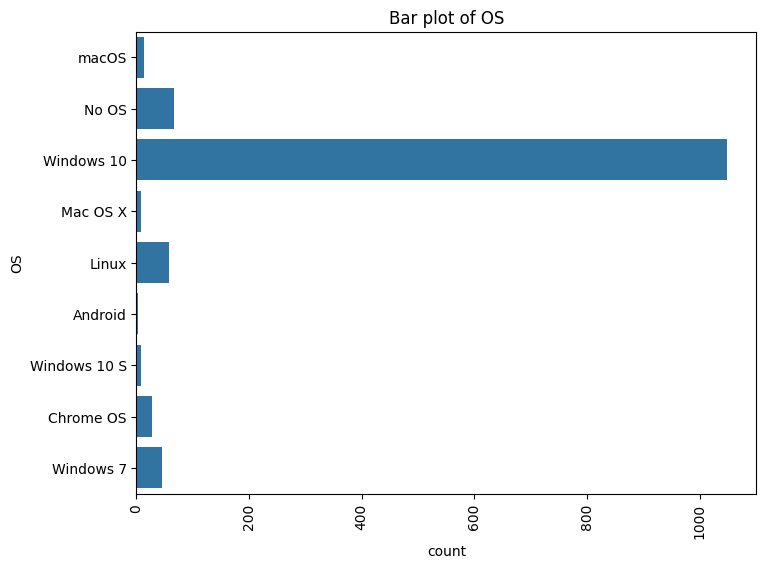

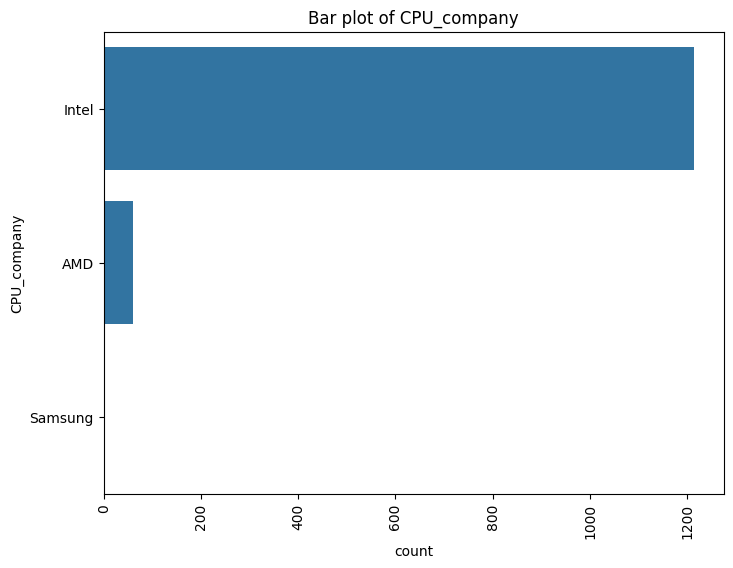

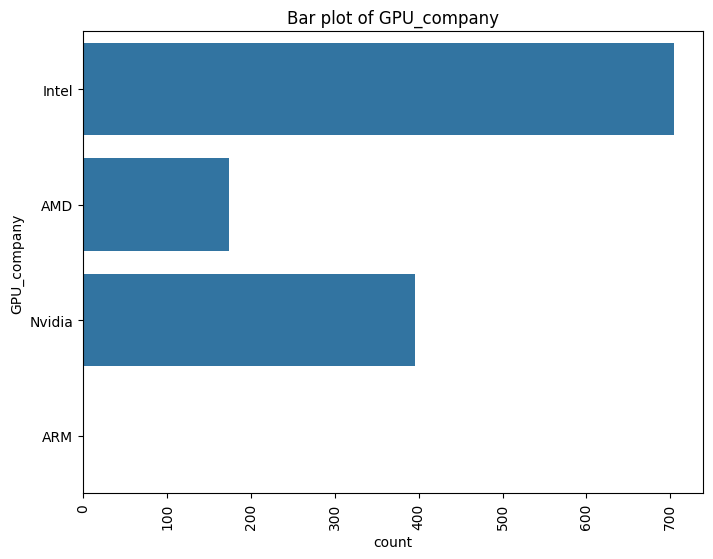

In [9]:
numerical_features = ['Inches', 'Ram', 'Weight', 'Price_euros', 'CPU_freq']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    plt.show()
categorical_features = ['Company', 'TypeName', 'OS', 'CPU_company', 'GPU_company']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(df[feature])
    plt.title(f'Bar plot of {feature}')
    plt.xticks(rotation=90)
    plt.show()


**Bivariate Analysis**


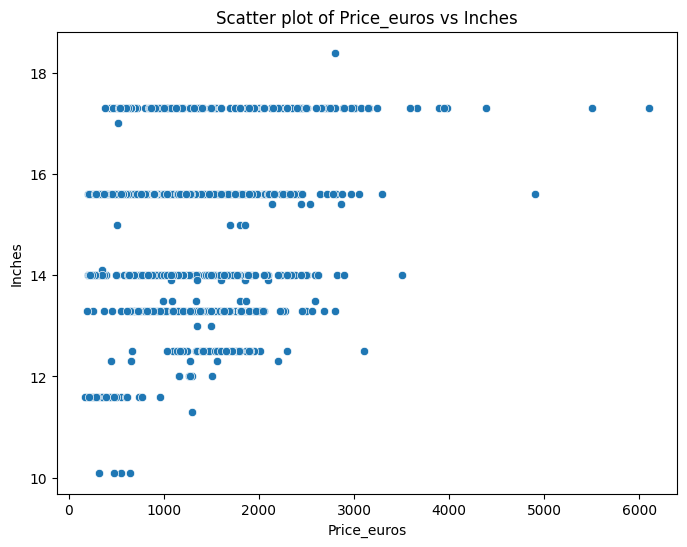

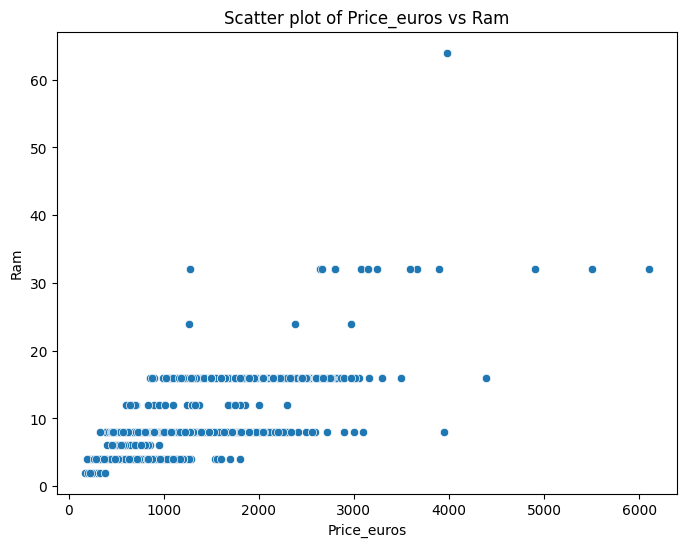

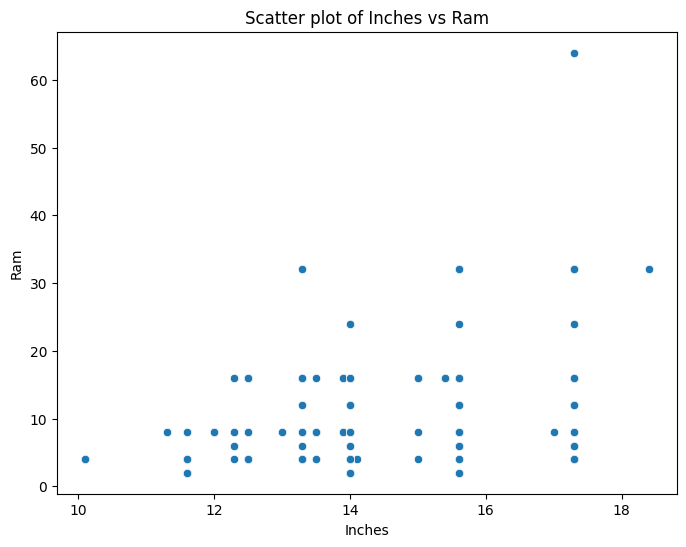

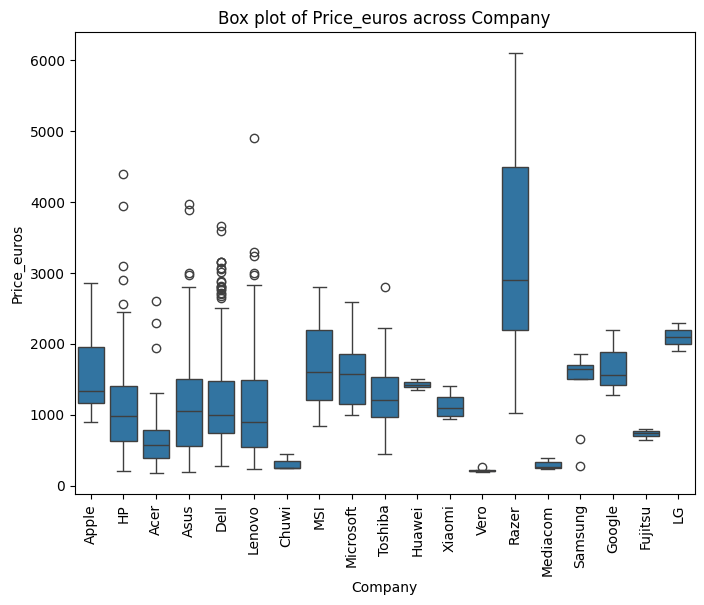

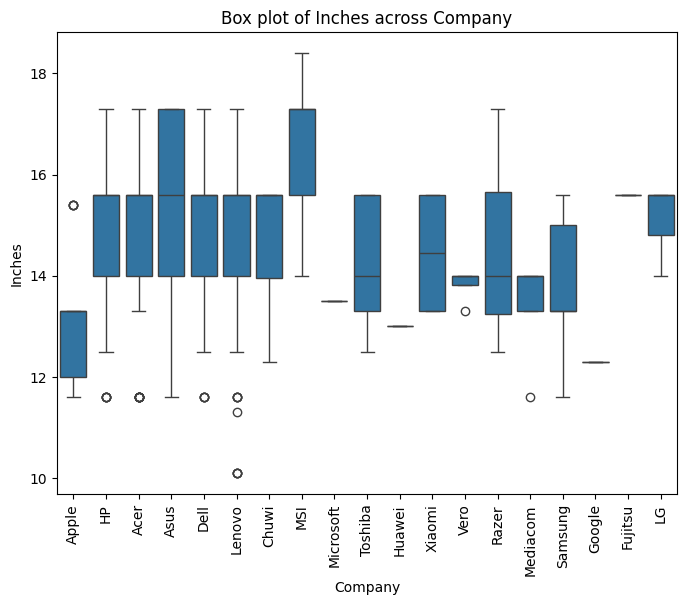

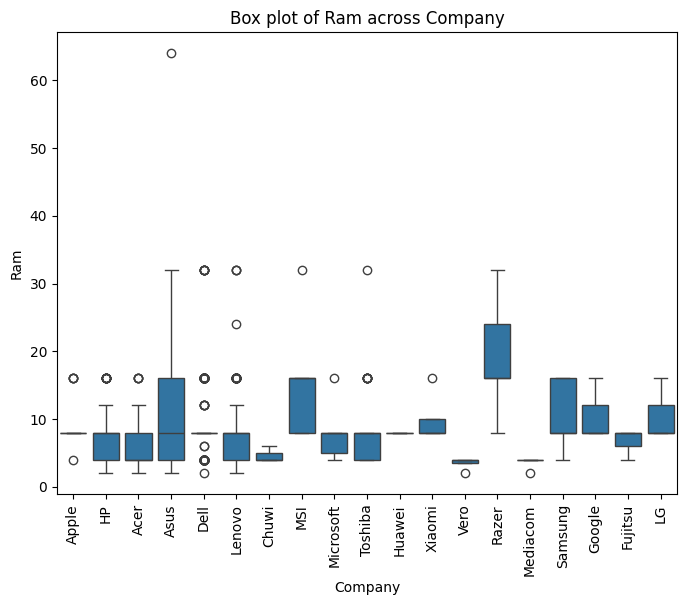

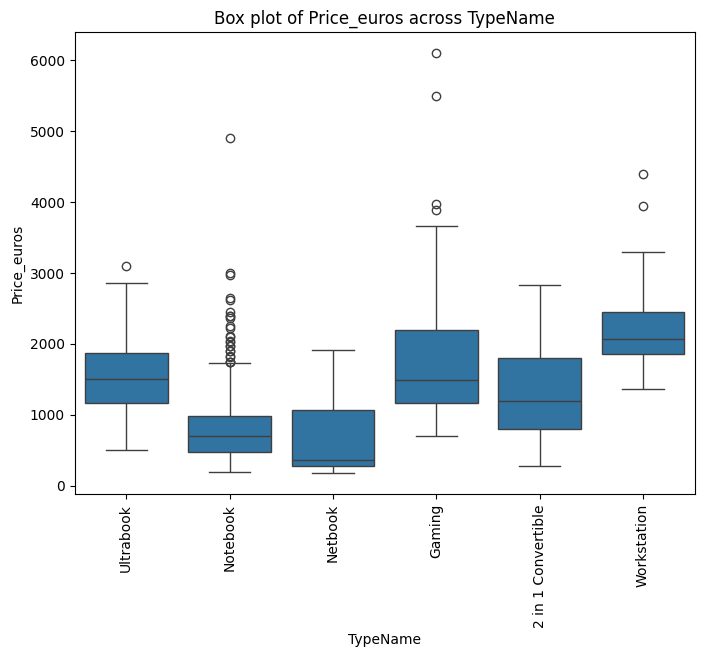

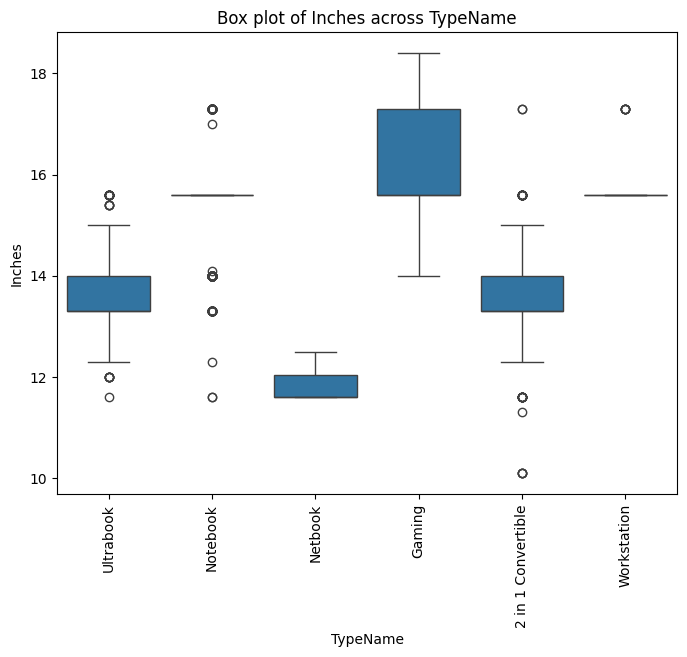

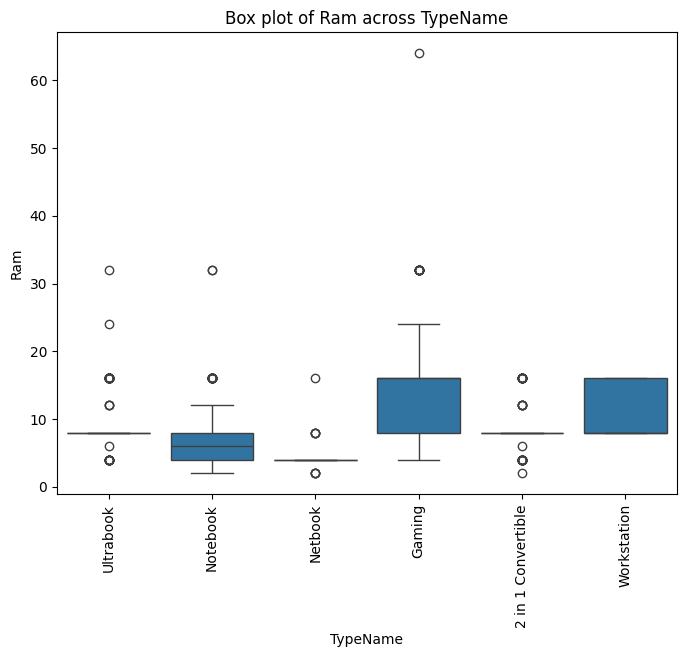

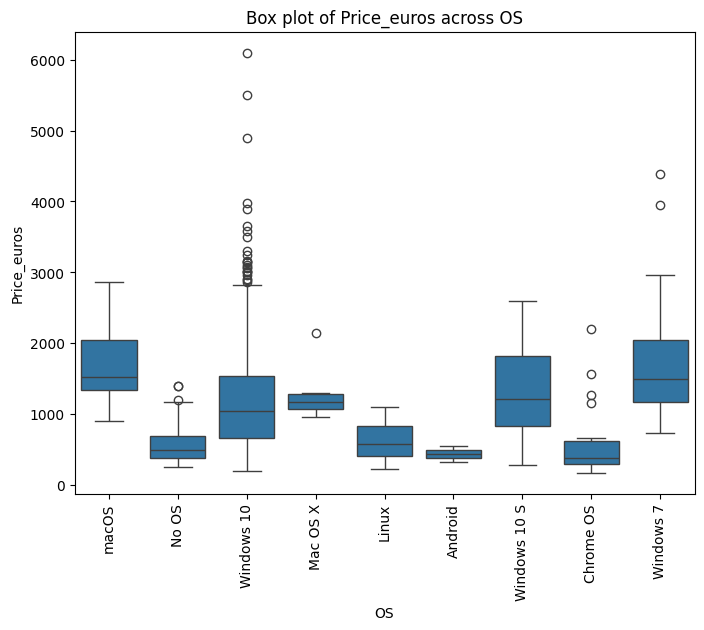

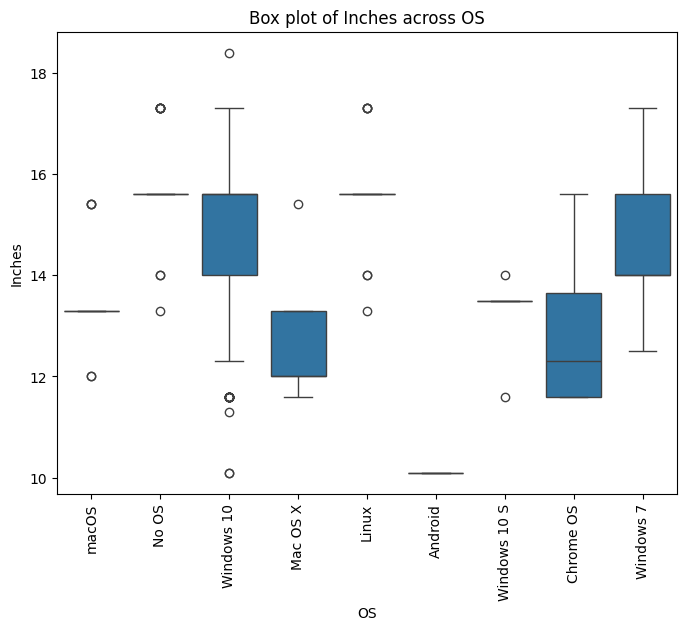

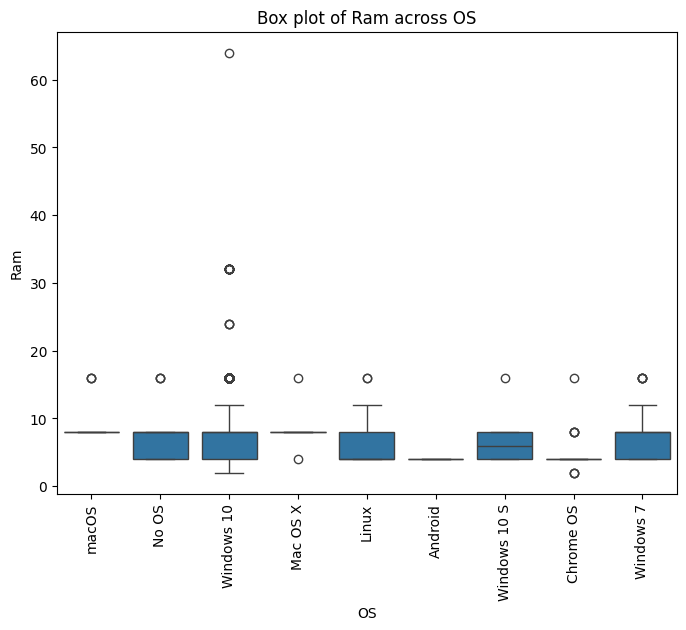

In [10]:
numerical_feature_pairs = [('Price_euros', 'Inches'), ('Price_euros', 'Ram'), ('Inches', 'Ram')]
for feature1, feature2 in numerical_feature_pairs:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[feature1], y=df[feature2])
    plt.title(f'Scatter plot of {feature1} vs {feature2}')
    plt.show()

categorical_features = ['Company', 'TypeName', 'OS']
numerical_features = ['Price_euros', 'Inches', 'Ram']
for categorical_feature in categorical_features:
    for numerical_feature in numerical_features:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[categorical_feature], y=df[numerical_feature])
        plt.title(f'Box plot of {numerical_feature} across {categorical_feature}')
        plt.xticks(rotation=90)
        plt.show()


**Feature Engineering**


In [11]:
df['Price_per_inch'] = df['Price_euros'] / df['Inches']
df['RAM_category'] = pd.cut(df['Ram'], bins=[0, 4, 8, 16, np.inf], labels=['Low', 'Medium', 'High', 'Very High'])

# Summary and Insights
print(df[numerical_features].describe())
print(df.groupby('Company')['Price_euros'].mean().sort_values(ascending=False))
print(df.groupby('Inches')['Price_euros'].mean().sort_values(ascending=False))


       Price_euros       Inches          Ram
count  1275.000000  1275.000000  1275.000000
mean   1134.969059    15.022902     8.440784
std     700.752504     1.429470     5.097809
min     174.000000    10.100000     2.000000
25%     609.000000    14.000000     4.000000
50%     989.000000    15.600000     8.000000
75%    1496.500000    15.600000     8.000000
max    6099.000000    18.400000    64.000000
Company
Razer        3346.142857
LG           2099.000000
MSI          1728.908148
Google       1677.666667
Microsoft    1612.308333
Apple        1564.198571
Huawei       1424.000000
Samsung      1413.444444
Toshiba      1267.812500
Dell         1199.225120
Xiaomi       1133.462500
Asus         1123.829737
Lenovo       1093.862215
HP           1080.314664
Fujitsu       729.000000
Acer          633.464455
Chuwi         314.296667
Mediacom      295.000000
Vero          217.425000
Name: Price_euros, dtype: float64
Inches
18.4    2799.000000
15.4    2493.847500
17.3    1673.061402
13.9    163

**Train-Test Split**

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)



Shape of X_train:  (1020, 874)
Shape of X_test:  (255, 874)
Shape of y_train:  (1020,)
Shape of y_test:  (255,)


**Train the Model**

In [24]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)


print(model)


RandomForestRegressor(random_state=42)


**feature importances**

In [25]:
feature_importances = model.feature_importances_
print(feature_importances)



[1.88678197e-02 5.51550473e-01 6.57515250e-02 8.75843481e-03
 1.10721625e-02 4.74669576e-02 1.43822171e-02 1.91872190e-03
 6.49671976e-05 4.26829675e-03 4.37511843e-06 2.42623161e-03
 3.76269024e-05 1.52407824e-05 4.22716314e-03 3.13444161e-05
 3.36398757e-04 3.58035780e-03 5.09498876e-04 6.11230507e-07
 3.66003451e-05 4.51928670e-03 7.90219410e-05 4.44711518e-04
 1.65699459e-05 1.27097114e-05 1.91869616e-07 9.30762267e-07
 3.23925237e-06 8.40019855e-07 1.58518437e-06 3.90109443e-07
 2.90505476e-06 1.44695788e-04 0.00000000e+00 3.47376317e-07
 2.04774984e-07 0.00000000e+00 1.52342770e-05 1.01369753e-06
 4.81889459e-07 0.00000000e+00 1.26891788e-07 1.16378041e-06
 0.00000000e+00 3.44286257e-06 5.19409062e-05 1.27111842e-07
 0.00000000e+00 1.10610615e-05 1.34406428e-05 1.66082824e-05
 2.28020775e-08 5.92004720e-06 0.00000000e+00 5.09586357e-07
 9.64394110e-07 4.72232430e-07 8.94867802e-07 2.11136634e-07
 1.57777072e-05 1.75031288e-06 4.20370906e-07 0.00000000e+00
 3.54763159e-07 2.241788

**feature importances using a bar chart**

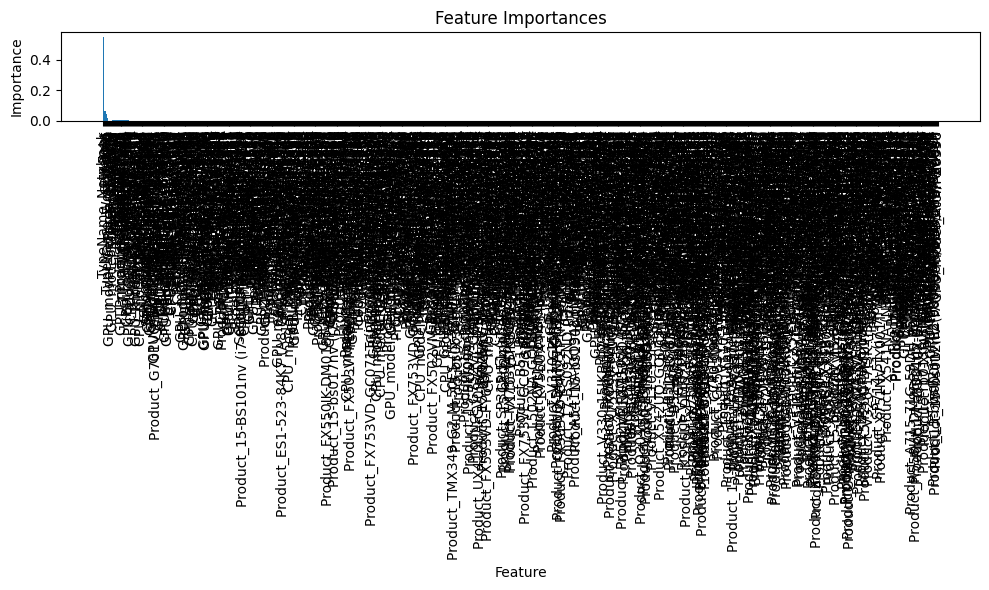

In [27]:
import matplotlib.pyplot as plt
import numpy as np

feature_importances = model.feature_importances_
feature_names = X_train.columns

# Sort the feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[indices])
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()



**Make Predictions**

In [33]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

print("Actual values: ", y_test)
print("Predicted values: ", y_pred)
print("Difference: ", y_test - y_pred)



Actual values:  1179     650.0
342      716.0
649     1584.0
772     1020.0
803     1749.0
         ...  
701      399.0
1105    1413.1
424     2799.0
944     1299.0
65      1983.0
Name: Price_euros, Length: 255, dtype: float64
Predicted values:  [ 736.475       883.4938     1656.4312      746.0112     1651.5125
  606.9909      914.8306      336.7081     2238.1926      767.5862
  535.5169     1137.87656667  935.1753     1904.2443     2360.63563333
  648.5196     1438.4554      976.08       1701.9107     1901.7226
  747.3192      413.614      1671.02233333 1724.2256      845.2673
 2458.6149      869.1776     1069.5388      549.2132      862.18086667
  989.5071      596.0406      721.2157      347.4177      632.3073
  857.437      1000.4818      609.832      1210.4122     1039.0069
 1308.6542      355.3455     1239.39003333  946.4578      950.08273333
 1286.45       1642.69908095  828.8295     2209.7278      946.4926
  951.4928      257.5879     1801.3135      263.6899      784.2757
 158

**Evaluate the Model**

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mae)

# Calculate the R-squared (R2) value
r2 = r2_score(y_test, y_pred)
print("R-squared: ", r2)



Mean Squared Error:  65314.90922078082
Mean Absolute Error:  171.8155894263928
R-squared:  0.8684067279363059


**Visualizing Predicted vs Actual Values**


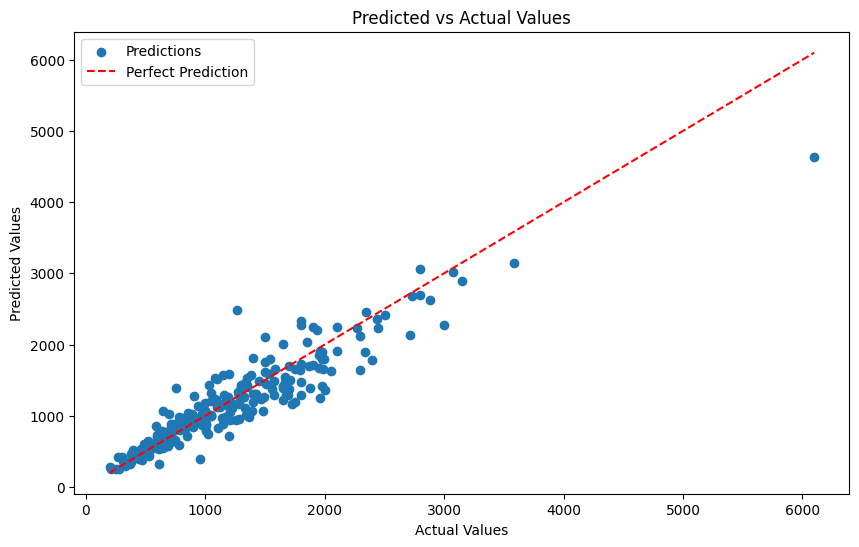

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.show()



**Difference between actual and predicted values (Residuals )**

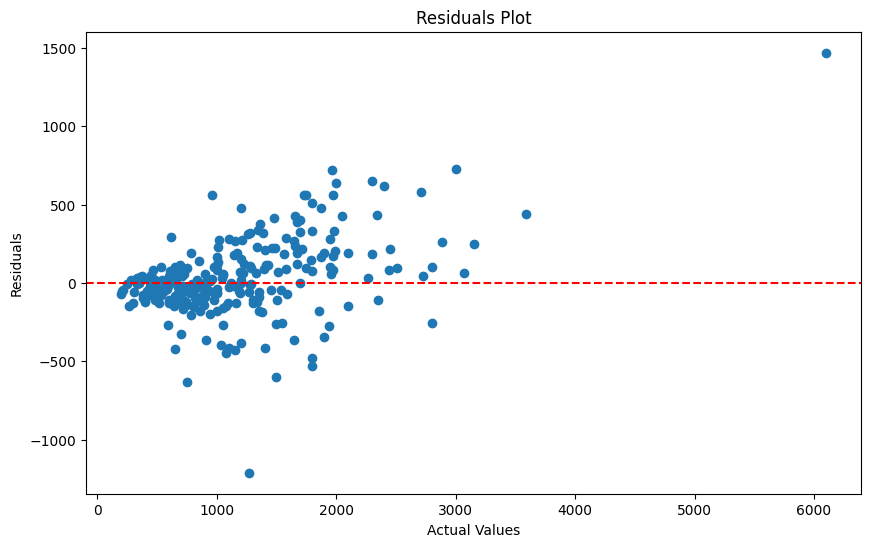

In [36]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()
